# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, auc, roc_curve, silhouette_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
import matplotlib as plt

# Load Data

In [ ]:
#Read the data
df=pd.read_csv("news.csv", engine="python", error_bad_lines=False)
#Get shape and head
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# Analyzing Dataset

## max, min, avg number of characters in text instances

In [ ]:
max_char_count = 0
min_char_count = 99999999
total = 0
for i in range(len(df)):
  length = len(df.get("text")[i])
  total += length
  if min_char_count > length and length > 1:
    min_wchar_count = length
  elif max_char_count < length:
    max_char_count = length
    
print("minimum char count is " + str(min_char_count) + "\n",
      "maximum char count is " + str(max_char_count) + "\n",
      "avg char count is " + str(int(total / len(df))))

minimum char count is 99999999
 maximum char count is 1
 avg char count is 5062


## max, min, avg number of words in text instances

In [ ]:
max_word_count = 0
min_word_count = 99999999
total = 0
count = df['text'].str.split().str.len()
# count.index = count.index.astype(str) + ' words:'
# count.sort_index(inplace=True)
for index in count:
  total += index
  if index > max_word_count:
    max_word_count = index
  elif index < min_word_count and index > 0:
    min_word_count = index

print("minimum word count is " + str(min_word_count) + "\n",
      "maximum word count is " + str(max_word_count) + "\n",
      "avg word count is " + str(int(total / len(df))))

minimum word count is 6
 maximum word count is 7503
 avg word count is 835


# Data Preprocessing

## get the labels

In [ ]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

## Split Dataset Into Training and Test Set

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

# Feature Selection

### Tfidf vectorizer

In [ ]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7, max_features=1000)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df.get("text"))

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

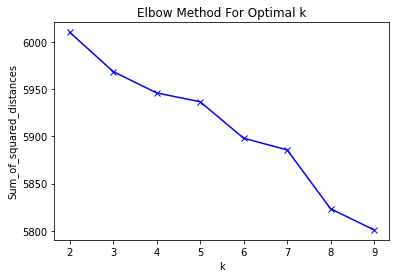

In [ ]:
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=100, n_init=1)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
  
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
km = KMeans(n_clusters=8, max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.cluster_centers_

array([[0.00576488, 0.01024655, 0.00487639, ..., 0.00469689, 0.01422689,
        0.00788407],
       [0.01555078, 0.01480473, 0.00521005, ..., 0.00522805, 0.00797249,
        0.00770304],
       [0.00919322, 0.00889225, 0.00421962, ..., 0.0052291 , 0.01782573,
        0.00571405],
       ...,
       [0.0167687 , 0.0062539 , 0.00311125, ..., 0.00313063, 0.01265045,
        0.00193313],
       [0.01218637, 0.00725783, 0.00555363, ..., 0.00644771, 0.02061504,
        0.01161262],
       [0.01629466, 0.01065827, 0.00487523, ..., 0.00207039, 0.00607331,
        0.00266254]])

### count vectorizer

In [ ]:
count_vec = CountVectorizer(binary=True, stop_words="english", max_features=1000)
count_vec_train = count_vec.fit_transform(x_train)
count_vec_test = count_vec.fit_transform(x_test)

# Train and Test

## Passive Aggresive Classifier

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.53%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])


array([[547,  91],
       [ 67, 562]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.8752784935678577

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.8752959747434885

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(count_vec_train,y_train)
#Predict on the test set and calculate accuracy
y_pred=pac.predict(count_vec_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 54.7%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[322, 316],
       [258, 371]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.5462827097089753

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.5469613259668509

## Multinominal

In [ ]:
mn_clf = MultinomialNB(alpha=0.1)
mn_clf.fit(tfidf_train,y_train)
y_pred = mn_clf.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.29%


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[552,  86],
       [113, 516]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.8428091643791462

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.8429360694554064

In [ ]:
mn_clf = MultinomialNB(alpha=0.1)
mn_clf.fit(count_vec_train,y_train)
y_pred = mn_clf.predict(count_vec_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 59.51%


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[250, 388],
       [125, 504]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.5781526545441801

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.5951065509076559

## SGD classifier

In [ ]:
sgd_tfidf_clf = SGDClassifier()
sgd_tfidf_clf.fit(tfidf_train, y_train)
y_pred = sgd_tfidf_clf.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.74%


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[567,  71],
       [ 59, 570]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.8973948470048839

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.8973954222573007

In [ ]:
sgd_tfidf_clf = SGDClassifier()
sgd_tfidf_clf.fit(count_vec_train, y_train)
y_pred = sgd_tfidf_clf.predict(count_vec_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 52.41%


In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[314, 324],
       [279, 350]])

In [ ]:
f1_score(y_test,y_pred, average="macro")

0.5236880709579157

In [ ]:
f1_score(y_test,y_pred, average="micro")

0.5240726124704025

In [ ]:
sk

# Delivery 5

## elbow method to find the k value

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt